<a href="https://colab.research.google.com/github/nannthd/bsc_dpdm22/blob/main/Classification_KKN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import load_digits
digits = load_digits()

import matplotlib.pyplot as plt

In [ ]:
digits

8


<Figure size 432x288 with 0 Axes>

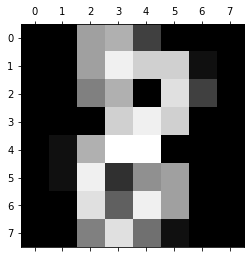

In [3]:
ind = 28
plt.gray()
plt.matshow(digits.images[ind])
print(digits.target[ind])

# Quiz 3 march
- แบ่ง data ออกเป็น 80(train) 20(test) โดยใช้ random_state = เลขกลุ่ม(3) shuffle=True
- หา parameters ที่ดีที่สุด (K (1,3,5) Distance_weighted (yes/no)) ด้วย 10-fold-cross-validation
- test parameters ที่ดีที่สุดกับ test data

In [4]:
X = digits['data']
y = digits['target']

In [5]:
X

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [6]:
y

array([0, 1, 2, ..., 8, 9, 8])

In [7]:
import pandas as pd
import numpy as np

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [9]:
# Load the digits dataset
digits = load_digits()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=3, shuffle=True)

# Define the hyperparameters to test
n_neighbors = [1, 3, 5]
weights = ['uniform', 'distance']

# Initialize variables to keep track of the best hyperparameters and the highest cross-validation score
best_params = None
best_score = 0

# Test each combination of hyperparameters
for n in n_neighbors:
    for w in weights:
        # Create a KNN classifier object with the current hyperparameters
        knn = KNeighborsClassifier(n_neighbors=n, weights=w)
        
        # Calculate the average cross-validation score for this combination of hyperparameters
        scores = cross_val_score(knn, X_train, y_train, cv=10)
        avg_score = scores.mean()
        
        # Check if this combination of hyperparameters is better than the previous best
        if avg_score > best_score:
            best_score = avg_score
            best_params = {'n_neighbors': n, 'weights': w}

# Print the best hyperparameters and the corresponding cross-validation score
print('Best hyperparameters:', best_params)
print('Cross-validation score:', best_score)

# Create a KNN classifier object with the best hyperparameters and fit it to the training data
best_knn = KNeighborsClassifier(n_neighbors=best_params['n_neighbors'], weights=best_params['weights'])
best_knn.fit(X_train, y_train)

# Calculate the accuracy score on the test data
test_score = best_knn.score(X_test, y_test)
print('Test accuracy score:', test_score)

Best hyperparameters: {'n_neighbors': 1, 'weights': 'uniform'}
Cross-validation score: 0.9867618492618492
Test accuracy score: 0.9888888888888889


## เฉลย Quiz

In [10]:
from sklearn.model_selection import train_test_split, cross_val_score

In [16]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=3)


In [17]:
from sklearn.neighbors import KNeighborsClassifier

### model selection

In [18]:
# model 1 (K=1, weighted)
knn_distance = KNeighborsClassifier(n_neighbors=1, weights='distance')
scores = cross_val_score(knn_distance, X_train, y_train, cv=10)
print("Mean Cross-Validation Score: K1weighted", scores.mean())

# model 2 (K=3, weighted)
knn_distance = KNeighborsClassifier(n_neighbors=3, weights='distance')
scores = cross_val_score(knn_distance, X_train, y_train, cv=10)
print("Mean Cross-Validation Score: K3weighted", scores.mean())

# model 3 (K=5, weighted)
knn_distance = KNeighborsClassifier(n_neighbors=5, weights='distance')
scores = cross_val_score(knn_distance, X_train, y_train, cv=10)
print("Mean Cross-Validation Score: K5weighted", scores.mean())

# model 4 (K=1, no weighted)
knn_distance = KNeighborsClassifier(n_neighbors=1, weights='uniform')
scores = cross_val_score(knn_distance, X_train, y_train, cv=10)
print("Mean Cross-Validation Score: K1NOweighted", scores.mean())

# model 5 (K=3, no weighted)
knn_distance = KNeighborsClassifier(n_neighbors=3, weights='uniform')
scores = cross_val_score(knn_distance, X_train, y_train, cv=10)
print("Mean Cross-Validation Score: K3NOweighted", scores.mean())

# model 6 (K=5, no weighted)
knn_distance = KNeighborsClassifier(n_neighbors=5, weights='uniform')
scores = cross_val_score(knn_distance, X_train, y_train, cv=10)
print("Mean Cross-Validation Score: KNOweighted", scores.mean())

Mean Cross-Validation Score: K1weighted 0.9867618492618492
Mean Cross-Validation Score: K3weighted 0.985368104118104
Mean Cross-Validation Score: K5weighted 0.9839792152292152
Mean Cross-Validation Score: K1NOweighted 0.9867618492618492
Mean Cross-Validation Score: K3NOweighted 0.985368104118104
Mean Cross-Validation Score: KNOweighted 0.9832847707847707


### Evaluate with test set

In [19]:
knn_distance = KNeighborsClassifier(n_neighbors=5, weights='distance')

knn_distance.fit(X_train,y_train)

y_pred = knn_distance.predict(X_test)

In [20]:
from sklearn.metrics import accuracy_score

# Assume y_true and y_pred are the true and predicted labels, respectively
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy score
print("Accuracy score: ", accuracy)


Accuracy score:  0.9861111111111112


#HW 7

หา โมเดลที่ดีที่สุด จาก DT,NaiveBayes,KNN,ANN โดย เปรียบเทียบ อย่างละสอง parameter sets

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Decision Tree
dtc_1 = DecisionTreeClassifier(max_depth=1, random_state=3)
dtc_2 = DecisionTreeClassifier(max_depth=5, random_state=3)

# Naive Bayes
gnb_1 = GaussianNB()
gnb_2 = GaussianNB(var_smoothing=0.1)

# KNN
knn_1 = KNeighborsClassifier(n_neighbors=1, weights='distance')
knn_2 = KNeighborsClassifier(n_neighbors=1, weights='uniform')

# ANN
mlp_1 = MLPClassifier(hidden_layer_sizes=(10,), max_iter=1000, random_state=3)
mlp_2 = MLPClassifier(hidden_layer_sizes=(50,), max_iter=1000, random_state=3)

# Train and evaluate models
models = [(dtc_1, "DT1"), (dtc_2, "DT2"), (gnb_1, "NB1"), (gnb_2, "NB2"), (knn_1, "KNN1"), (knn_2, "KNN2"), (mlp_1, "ANN1"), (mlp_2, "ANN2")]

best_model = None
best_accuracy = 0

for model, name in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} accuracy: {accuracy}")
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = name

print(f"\nBest model: {best_model} with accuracy {best_accuracy}")

DT1 accuracy: 0.14166666666666666
DT2 accuracy: 0.7027777777777777
NB1 accuracy: 0.8444444444444444
NB2 accuracy: 0.9111111111111111
KNN1 accuracy: 0.9888888888888889
KNN2 accuracy: 0.9888888888888889
ANN1 accuracy: 0.9527777777777777
ANN2 accuracy: 0.9694444444444444

Best model: KNN1 with accuracy 0.9888888888888889
